**FILL THIS SECTION BY YOUR NAME AND STUDENT CODE** : 

- NAME : Sayed Hesam Alavian


In [ ]:
import pandas as pd
import numpy as np
# IMPORT MORE MODULES IF YOU WANT
import sklearn 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
import math 
import warnings
import seaborn as sns #just for drawing better  charts
from collections import Counter
import io
import requests

### Read Dataset

Read the dataset in this section.

In [ ]:
# FILL HERE
url = 'https://drive.google.com/u/0/uc?id=1mQe-7keNmO2QdZArWMBXpMz8JTy2xbdm&export=download'
data = pd.read_csv(url) #Read Dataset
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


### Prepare Dataset

First of all, search for missing values in the dataset. if there are missing values, handle them however you want.

In [ ]:
# FILL HERE
new_data = data.dropna()# Drop rows have null cells
if len(data) != len(new_data):
  print('The rows have null cells, have been droped.')
else:
  print('The rows have not null cells.')
print('\n', new_data.head())

The rows have not null cells.

    age  sex  cp  trestbps  chol  fbs  ...  exang  oldpeak  slope  ca  thal  target
0   63    1   3       145   233    1  ...      0      2.3      0   0     1       1
1   37    1   2       130   250    0  ...      0      3.5      0   0     2       1
2   41    0   1       130   204    0  ...      0      1.4      2   0     2       1
3   56    1   1       120   236    0  ...      0      0.8      2   0     2       1
4   57    0   0       120   354    0  ...      1      0.6      2   0     2       1

[5 rows x 14 columns]


Then, read the dataset catalog. There are some categorical features with the "int" type. Encode these features so that you can distinguish between numerical and categorical features.

In [ ]:
# FILL HERE
categorical = ['sex' , 'cp' ,'fbs' ,  'restecg' , 'exang'  , 'slope' , 'thal' ]
numerical = ['age' ,  'trestbps' , 'chol' , 'thalach' , 'oldpeak' , 'ca' ]


### Declare feature vector and target variable

Here, you are supposed to convert pandas data frame into feature vectors and target variables

In [ ]:
X = pd.concat([data[categorical], data[numerical]], axis=1) ## Just sort them, no need for encoding
Y = data['target']
print(X.head())
print('\n', Y.head())


   sex  cp  fbs  restecg  exang  ...  trestbps  chol  thalach  oldpeak  ca
0    1   3    1        0      0  ...       145   233      150      2.3   0
1    1   2    0        1      0  ...       130   250      187      3.5   0
2    0   1    0        0      0  ...       130   204      172      1.4   0
3    1   1    0        1      0  ...       120   236      178      0.8   0
4    0   0    0        1      1  ...       120   354      163      0.6   0

[5 rows x 13 columns]

 0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64


### Split data into separate training and test set

Now it's time to split X and y into separate training and test set. You can use the sklearn library for this section.

In [ ]:
# FILL HERE
X_train , X_test , Y_train , Y_test = train_test_split(X,Y,test_size=0.2)

## Implement desicion tree algorithm

In this cell, you are going to implement your decision tree. Feel free to add more arguments to functions or add your desired functions.

In [ ]:
class DecisionTree(object):
     
    def __init__(self, criterion = 'entropy', max_depth=None):
        self.tree = {}
        self.residual_tree = {} ## For prediction
        self.max_depth = max_depth
        self.criterion = criterion

    def entropy(self, class_y):
      if len(class_y) <=1: ## Handling if there is only 1 or 0 labels
          return 0

      total_count = np.bincount(class_y) # count
      probabilities = total_count[np.nonzero(total_count)] / len(class_y) # Find the probabilities
      if len(probabilities) <= 1 : ## Handling if the length of the probabilities is less than or equal to 1
          return 0

      return - np.sum(probabilities * np.log(probabilities)) / np.log(len(probabilities) ) ## Entropy equation

    def gini(self, class_y):
      if len(class_y) <=1: ## Handling if there is only 1 or 0 labels
        return 0

      one_ratio = sum(class_y) / len(class_y)
      zero_ratio = 1 - one_ratio
      return(1- np.sum(np.square([zero_ratio,one_ratio])))
    
    def information_gain(self, previous_y, current_y, criterion): 
      a = criterion     
      if a == 'entropy':
          conditional_entropy = 0 ## IG = H(Y) - CE(Y|X)
          for y in current_y:
              conditional_entropy += (self.entropy(y)*len(y)/len(previous_y))

          info_gain = self.entropy(previous_y) - conditional_entropy
          return info_gain
      elif(a == 'gini'):
          conditional_gini = 0 ## IG = H(Y) - CE(Y|X)
          for y in current_y:
              conditional_gini += (self.gini(y)*len(y)/len(previous_y))

          info_gain = self.gini(previous_y) - conditional_gini
          return info_gain

    def partition_classes(self, X, y, split_attribute, split_val):
      X = np.array(X)
      column_split = X[:,split_attribute]
      X_left=[]
      y_right = []
      X_right = []
      y_left = []
      
      counter=0 ## Counter for appending
      
      if isinstance(split_val,str) == False: ## Numerical attribute
          for i in column_split:
              if i <= split_val:
                  X_left.append(X[counter])
                  y_left.append(y[counter])
              else:
                  X_right.append(X[counter])
                  y_right.append(y[counter])
              counter+=1
              
      else: ## Categorical attribute
          for i in column_split:
              if i == split_val: ## == and NOT <=
                  X_left.append(X[counter])
                  y_left.append(y[counter])
              else:
                  X_right.append(X[counter])
                  y_right.append(y[counter])
              counter+=1

      return X_left, X_right, y_left, y_right

    def find_best_split(self, X, y, split_attribute):
        best_info_gain = 0 # Initialize the best information gain
        X = np.array(X)
        column_split = X[:,split_attribute]

        column_split = np.unique(column_split) ## Get the unique values only !
        best_split_val = column_split[0] ## Set the best split as the initial one ( in case it is the only one)

        for split_val in column_split:
            current_X_left, current_X_right, current_y_left, current_y_right = self.partition_classes(X, y, split_attribute, split_val) ## Call the partition classes function
            current_y = []
            current_y.append(current_y_left)
            current_y.append(current_y_right)
      
            
            current_info_gain = self.information_gain(y, current_y, self.criterion) ## Calculate the information gain            
            if current_info_gain > best_info_gain: ## check if it is better than before
                best_info_gain = current_info_gain
                best_split_val = split_val

        return best_split_val, best_info_gain 

    def find_best_feature(self, X, y):
      best_info_gain = 0
      best_feature = 0
      best_split_val = 0
      for feature_index in range(len(X[0])): ## Loop over the features , find the best split 
          current_best_split_val, current_best_info_gain =  self.find_best_split(X, y,  feature_index)
          if current_best_info_gain > best_info_gain:
              best_info_gain = current_best_info_gain
              best_feature = feature_index
              best_split_val = current_best_split_val
      return best_feature, best_split_val

    def fit(self, X, y, depth):
                # base cases
        unique_labels = np.unique(y) 
        if (len(unique_labels)==1) or (depth == max_depth): ## IF we reach the maximum depth or the unique labels = 1
            unique_labels, counts_unique_labels = np.unique(y, return_counts=True)
            index = counts_unique_labels.argmax()
            classification = unique_labels[index]    
            return classification
    
        best_feat, best_split  = self.find_best_feature(X, y) ## Find best feature (Step 1)
        best_split, information_gain = self.find_best_split(X, y, best_feat) ## Split on this feature (Step 2)
        X_left, X_right, y_left, y_right = self.partition_classes(X, y, best_feat, best_split) ## Partition on the best feature and split (Step 3)
        
        if isinstance(best_split,str):
            question = "{} == {}".format(best_feat, best_split) ## Represnt the sub-tree as a question and an answer
        else:
            question = "{} <= {}".format(best_feat, best_split) ## Represnt the sub-tree as a question and an answer
        node = {question: []}
        
        # find answers (recursion)
        depth+=1 
        yes_answer = self.fit(X_left,y_left, depth)  # RECURSION on the left sub tree
        no_answer = self.fit(X_right, y_right, depth) ## RECURSION on the right sub tree
        
        if yes_answer == no_answer: ## Both trees are the same
            node = yes_answer
        else:
            node[question].append(yes_answer) ## Append the questions to the answers
            node[question].append(no_answer)
        self.tree = node ## The tree is equal to the node
        return node
            
    def predict(self, record,flag=1): #record: D*1, a single data point that should be classified
        if flag == 1: ## First time
            self.residual_tree = self.tree        
        question = list(self.residual_tree.keys())[0]
        feature, comparison, value = question.split() ## Split the question to get the feature and its value
        ## Check if str or int
        if comparison == "==": # String
            if record[int(feature)] == value:
                answer = self.residual_tree[question][0]  ## Left sub tree
            else:
                answer = self.residual_tree[question][1] ## Right sub-tree
        elif comparison == "<=": #Integer
            if record[int(feature)] <= float(value):
                answer = self.residual_tree[question][0] ## Right Sub-tree
            else:
                answer = self.residual_tree[question][1] ## Left sub-tree        try: ## Integer
                
        # base case
        if not isinstance(answer, dict):  ## If we have the answer
            return answer
    
        # recursion
        else:
            self.residual_tree = answer ## The residual tree is the answer !
            return self.predict(record,0) ## have flag = 0 so the residual tree is our sub-problem

In [ ]:
def confusion_matrix(y,yhat):
  TP, TN, FP, FN = 0, 0, 0, 0
  for i in range(len(y)):
    try:
      if y.loc(i) == 1:
        if yhat.loc(i) == 1:
          TP += 1
        else:
          FP += 1
      else:
        if yhat.loc(i) == 1:
          FN += 1
        else:
          TN += 1
    except:
      if y[i] == 1:
        if yhat[i] == 1:
          TP += 1
        else:
          FP += 1
      else:
        if yhat[i] == 1:
          FN += 1
        else:
          TN += 1

  return TP, TN, FP, FN



In [ ]:
def DecisionTreeEvalution(id3,X,y, verbose=False): ##Evalution

    y_predicted = []
    for record in X: 
        y_predicted.append(id3.predict(record))
    tp,tn,fp,fn = confusion_matrix(y_predicted, y)
    # Comparing predicted and true labels
    results = [prediction == truth for prediction, truth in zip(y_predicted, y)]

    # Accuracy
    accuracy = float(results.count(True)) / float(len(results))
    if verbose:
        print("accuracy: %.4f" % accuracy)
    return accuracy ,[tp,tn,fp,fn]

### Part 1 : Compare Gini and Entropy 

In [ ]:
#### Convert the dataframes to numpy arrays as our implementation works on NumPy arrays
X_train , X_test , Y_train , Y_test = X_train.to_numpy() , X_test.to_numpy() , Y_train.to_numpy() , Y_test.to_numpy()
inital_depth = 0
dt_gini = DecisionTree('gini', max_depth=None)
dt_entropy = DecisionTree('entropy', max_depth=None)

In this cell, fit both declared trees on the train set and predict values on the test set.

In [ ]:
# Building a tree
max_depth = None
dt_gini.fit(X_train, Y_train, inital_depth)
dt_entropy.fit(X_train, Y_train, inital_depth)

{'1 <= 0.0': [{'12 <= 0.0': [{'6 <= 2.0': [{'8 <= 115.0': [1,
        {'10 <= 136.0': [0,
          {'4 <= 0.0': [{'9 <= 302.0': [1, 0]},
            {'11 <= 0.2': [{'10 <= 143.0': [0, 1]}, 0]}]}]}]},
      {'11 <= 0.5': [{'7 <= 48.0': [{'3 <= 0.0': [0, {'7 <= 40.0': [0, 1]}]},
          1]},
        0]}]},
    {'11 <= 0.3': [{'0 <= 0.0': [1,
        {'10 <= 147.0': [{'3 <= 0.0': [0, 1]}, 0]}]},
      {'9 <= 299.0': [0, {'9 <= 303.0': [1, 0]}]}]}]},
  {'0 <= 0.0': [{'12 <= 0.0': [1, {'7 <= 58.0': [{'7 <= 54.0': [1, 0]}, 1]}]},
    {'7 <= 56.0': [{'10 <= 152.0': [{'10 <= 125.0': [1,
          {'8 <= 120.0': [0, {'2 <= 0.0': [1, 0]}]}]},
        {'6 <= 2.0': [1,
          {'9 <= 227.0': [1, {'9 <= 233.0': [0, {'3 <= 0.0': [0, 1]}]}]}]}]},
      {'9 <= 277.0': [{'10 <= 125.0': [0,
          {'11 <= 2.3': [{'10 <= 164.0': [{'7 <= 57.0': [0,
                {'11 <= 0.6': [1,
                  {'8 <= 150.0': [{'7 <= 59.0': [{'8 <= 134.0': [0, 1]}, 1]},
                    0]}]}]},
          

In [ ]:
print("dt_gini:\n")
dt_gini.tree

dt_gini:



{'1 <= 0.0': [{'12 <= 0.0': [{'6 <= 2.0': [{'4 <= 0.0': [{'9 <= 303.0': [{'10 <= 71.0': [0,
            1]},
          0]},
        {'3 <= 0.0': [1, {'5 <= 1.0': [{'8 <= 110.0': [1, 0]}, 1]}]}]},
      {'11 <= 0.5': [{'7 <= 48.0': [{'3 <= 0.0': [0, {'7 <= 40.0': [0, 1]}]},
          1]},
        0]}]},
    {'8 <= 108.0': [{'8 <= 100.0': [0, 1]},
      {'0 <= 0.0': [{'8 <= 130.0': [{'3 <= 1.0': [1, 0]}, 0]},
        {'10 <= 105.0': [{'11 <= 0.2': [1, 0]}, 0]}]}]}]},
  {'6 <= 2.0': [{'7 <= 55.0': [{'9 <= 149.0': [{'0 <= 0.0': [1, 0]},
        {'8 <= 108.0': [{'0 <= 0.0': [1, 0]}, 1]}]},
      {'0 <= 0.0': [{'7 <= 58.0': [{'7 <= 56.0': [1, 0]}, 1]},
        {'9 <= 243.0': [{'12 <= 0.0': [{'11 <= 2.3': [1, 0]},
            {'7 <= 59.0': [0, 1]}]},
          0]}]}]},
    {'8 <= 108.0': [1,
      {'9 <= 288.0': [{'9 <= 199.0': [{'10 <= 139.0': [0, 1]},
          {'12 <= 2.0': [{'5 <= 0.0': [{'1 <= 1.0': [0, 1]},
              {'7 <= 62.0': [0, {'10 <= 150.0': [0, 1]}]}]},
            1]}]},


In [ ]:
print('dt_entropy:\n')
dt_entropy.tree

dt_entropy:



{'1 <= 0.0': [{'12 <= 0.0': [{'6 <= 2.0': [{'8 <= 115.0': [1,
        {'10 <= 136.0': [0,
          {'4 <= 0.0': [{'9 <= 302.0': [1, 0]},
            {'11 <= 0.2': [{'10 <= 143.0': [0, 1]}, 0]}]}]}]},
      {'11 <= 0.5': [{'7 <= 48.0': [{'3 <= 0.0': [0, {'7 <= 40.0': [0, 1]}]},
          1]},
        0]}]},
    {'11 <= 0.3': [{'0 <= 0.0': [1,
        {'10 <= 147.0': [{'3 <= 0.0': [0, 1]}, 0]}]},
      {'9 <= 299.0': [0, {'9 <= 303.0': [1, 0]}]}]}]},
  {'0 <= 0.0': [{'12 <= 0.0': [1, {'7 <= 58.0': [{'7 <= 54.0': [1, 0]}, 1]}]},
    {'7 <= 56.0': [{'10 <= 152.0': [{'10 <= 125.0': [1,
          {'8 <= 120.0': [0, {'2 <= 0.0': [1, 0]}]}]},
        {'6 <= 2.0': [1,
          {'9 <= 227.0': [1, {'9 <= 233.0': [0, {'3 <= 0.0': [0, 1]}]}]}]}]},
      {'9 <= 277.0': [{'10 <= 125.0': [0,
          {'11 <= 2.3': [{'10 <= 164.0': [{'7 <= 57.0': [0,
                {'11 <= 0.6': [1,
                  {'8 <= 150.0': [{'7 <= 59.0': [{'8 <= 134.0': [0, 1]}, 1]},
                    0]}]}]},
          

In [ ]:
# Evaluating the decision tree
print('accuracy_dt_gini:')
accuracy_dt_gini, [tp_gini,tn_gini,fp_gini,fn_gini] = DecisionTreeEvalution(dt_gini,X_test,Y_test, True)
print('accuracy_dt_entropy:')
accuracy_dt_entropy, [tp_entropy,tn_entropy,fp_entropy,fn_entropy] = DecisionTreeEvalution(dt_entropy,X_test,Y_test, True)

accuracy_dt_gini:
accuracy: 0.7541
accuracy_dt_entropy:
accuracy: 0.8033


Plot confusion matrix for both decision trees.

confusion matrix for tree by gini



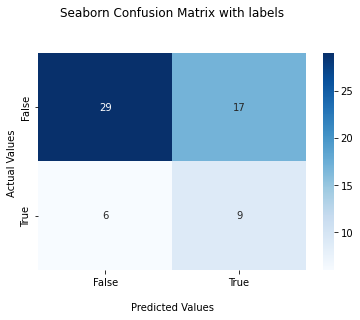

In [ ]:
print('confusion matrix for tree by gini\n')
ax = sns.heatmap([[tp_gini,tn_gini],[fp_gini,fn_gini]], annot=True, cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

confusion matrix for tree by entropy



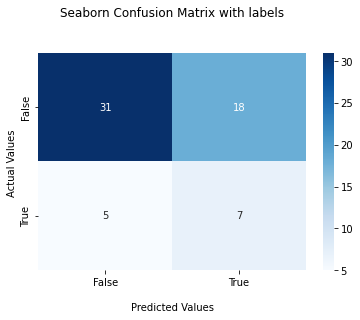

In [ ]:
print('confusion matrix for tree by entropy\n')
ax = sns.heatmap([[tp_entropy,tn_entropy],[fp_entropy,fn_entropy]], annot=True, cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()


### Part 2 : Let's add maximum depth!

Define an array of different maximum depths

In [ ]:
max_depths = 15 # FILL THIS LIST WITH DESIRED VALUES
accuracy_scores =[]
inital_depth = 0
for max_depth in range(1,max_depths) :
    dt = DecisionTree('entropy',max_depth) # Feel free to change the "entropy" to the "gini"
    # FIT declared tree to the train set and predict values on the test set. then calcualte accuracy score on the test set
    # Feel free to use the sklearn moudle for calcualting accuracy score.
    dt.fit(X_train, Y_train, inital_depth)    
    accuracy_score = DecisionTreeEvalution(dt, X_test, Y_test)
    accuracy_scores.append(accuracy_score)

In [ ]:
a = [i for i in range(1,max_depths)]
for depth, score in zip(a, accuracy_scores):
    print(f"Depth : {depth}, Accuracy : {score[0]}")

Depth : 1, Accuracy : 0.7868852459016393
Depth : 2, Accuracy : 0.819672131147541
Depth : 3, Accuracy : 0.9344262295081968
Depth : 4, Accuracy : 0.8688524590163934
Depth : 5, Accuracy : 0.8524590163934426
Depth : 6, Accuracy : 0.819672131147541
Depth : 7, Accuracy : 0.8032786885245902
Depth : 8, Accuracy : 0.8032786885245902
Depth : 9, Accuracy : 0.8032786885245902
Depth : 10, Accuracy : 0.8032786885245902
Depth : 11, Accuracy : 0.8032786885245902
Depth : 12, Accuracy : 0.8032786885245902
Depth : 13, Accuracy : 0.8032786885245902
Depth : 14, Accuracy : 0.8032786885245902


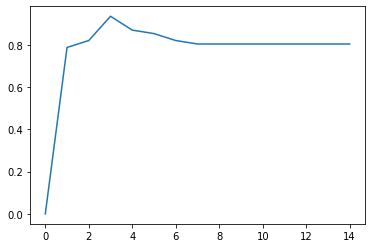

In [ ]:
accuracy_plot = [i[0] for  i in accuracy_scores]
# print(accuracy_scores , accuracy_scores + [0])
plt.plot(list(range(len(accuracy_plot)+1)),[0]+accuracy_plot)
plt.show()

Now compare the accuracy score of decision trees with and without using the "max_depth" parameter and discuss the effects of limiting the maximum depth of decision trees.


<div style="direction:rtl"> 
محدود کردن بیش از اندازه عمق باعث می شود که  مدل در وضعیت کم برازش  قرار گیرد و دقت آن بر روی داده های تست پایین آید. و از طرفی اگر اجازه دهیم درخت تا ماکسیمم عمق خود ساخته شود، مدل  به سمت بیش برازش  می رود و باز هم دقت روی داده های تست پایین می آید و از عمومیت مدل کاسته می شود.
 </div>